# Intro

In this notebook, we aim to merge multiple datasets into one df in order to do further analysis.

We aim to get the 'text' column of what we will be labelling as `text_df` , append a date via the `date_df`.

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load Datasets

**Including Text**

https://www.kaggle.com/datasets/michaelrussell4/10000-books-and-their-genres-standardized

In [2]:
text_df = pd.read_csv('datasets/books_and_genres.csv')

**Including Publication Date**

https://www.kaggle.com/datasets/saurabhbagchi/books-dataset

In [3]:
date_df = pd.read_csv('datasets/books.csv', encoding='ISO-8859-1', on_bad_lines='skip', sep=';', dtype={'Year-Of-Publication': 'str'})

# Basic Overview

In [4]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10635 entries, 0 to 10634
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10635 non-null  int64 
 1   title       10635 non-null  object
 2   text        10373 non-null  object
 3   genres      10635 non-null  object
dtypes: int64(1), object(3)
memory usage: 332.5+ KB


In [5]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


# Checking for missing data, dropping missing text

In [6]:
print(text_df.isnull().sum(), '\n\n', date_df.isnull().sum())

Unnamed: 0      0
title           0
text          262
genres          0
dtype: int64 

 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


From the above, we see 262 rows are missing `text` , and no `Year of Publication` is missing.

We will delete the rows where text is missing.

We also see 2 entries where `Book-Author` is missing.

In [7]:
text_df = text_df.dropna(subset=['text'])
date_df = date_df.dropna(subset=['Book-Author'])

# Dropping Unnecessary Columns

In [8]:
text_df = text_df.drop(columns=['Unnamed: 0'])

In [9]:
date_df = date_df.drop(columns=['ISBN', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

In [10]:
print(text_df.isnull().sum(), '\n\n', date_df.isnull().sum())

title     0
text      0
genres    0
dtype: int64 

 Book-Title             0
Book-Author            0
Year-Of-Publication    0
dtype: int64


# Merging `text_df` and `date_df`

In [11]:
# Renaming the column in date_df to match text_df
date_df.rename(columns={'Book-Title': 'title'}, inplace=True)

In [12]:
# Convert the 'title' column in both DataFrames to lowercase
text_df['title'] = text_df['title'].str.lower()
date_df['title'] = date_df['title'].str.lower()

In [13]:
novel_df = pd.merge(text_df, date_df, on='title', how='inner')

In [14]:
# Convert 'Year-Of-Publication' to numeric, ignoring errors ('coerce' turns errors into NaN)
novel_df['Year-Of-Publication'] = pd.to_numeric(novel_df['Year-Of-Publication'], errors='coerce')

# Drop rows where 'Year-Of-Publication' is less than 1900
novel_df = novel_df[novel_df['Year-Of-Publication'] >= 1950]

# Reset index if necessary
novel_df.reset_index(drop=True, inplace=True)

# Create a new column 'text_length' that contains the length of each book's text
novel_df = novel_df.copy()
novel_df['text_length'] = novel_df['text'].apply(len)

In [15]:
novel_df

,title,text,genres,Book-Author,Year-Of-Publication,text_length
0,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic...","Hodgson, William Hope",2003,280367
1,the house on the borderland,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'horror', 'mystery', 'classics', 'science-fic...",William Hope Hodgson,1996,280367
2,the warriors,"Produced by Charles Aldarondo, Charlie Kirschn...","{'literary-fiction', 'history', 'biography', '...",Sol Yurick,2003,276587
3,carmilla,"Produced by Suzanne Shell, Sjaani and PG Distr...","{'romance', 'novella', 'historical-fiction', '...",Joseph Sheridan Le Fanu,2003,155664
4,discourses,"Produced by Ted Garvin, Jayam Subramanian and ...","{'education', 'history', 'roman', 'classics', ...",Niccolo Machiavelli,1984,799865
...,...,...,...,...,...,...
2597,undertow,Produced by Charles Franks and the Online Dist...,"{'romance', 'contemporary', 'amazon', 'fiction...",Dixie Browning,2003,197319
2598,undertow,Produced by Charles Franks and the Online Dist...,"{'romance', 'contemporary', 'amazon', 'fiction...",Sally Helen Reid,1992,197319
2599,undertow,Produced by Charles Franks and the Online Dist...,"{'romance', 'contemporary', 'amazon', 'fiction...",Drake Douglas,1987,197319
2600,undertow,Produced by Charles Franks and the Online Dist...,"{'romance', 'contemporary', 'amazon', 'fiction...",Amy Schutzer,2000,197319


# EDA into novel_df

We'll be doing a EDA on the merged, `novel_df` , to determine how the data looks like.

In [30]:
def visualize_numerical(df, column_name):
    fig, ax = plt.subplots(2, 1, figsize=(14, 14))
    
    # Histogram with Kernel Density Estimate (KDE)
    sns.histplot(df[column_name], bins=30, ax=ax[0], kde=True) 
    ax[0].set_title(f'Histogram of {column_name}')
    
    # Boxplot
    sns.boxplot(x=df[column_name], ax=ax[1])
    ax[1].set_title(f'Boxplot of {column_name}')
    
    # Apply engineering formatter if the column is 'text_length'
    if column_name == 'text_length':
        ax[0].xaxis.set_major_formatter(ticker.EngFormatter())
        ax[1].xaxis.set_major_formatter(ticker.EngFormatter())

    plt.tight_layout()
    plt.show()

## Analysis on Numericals

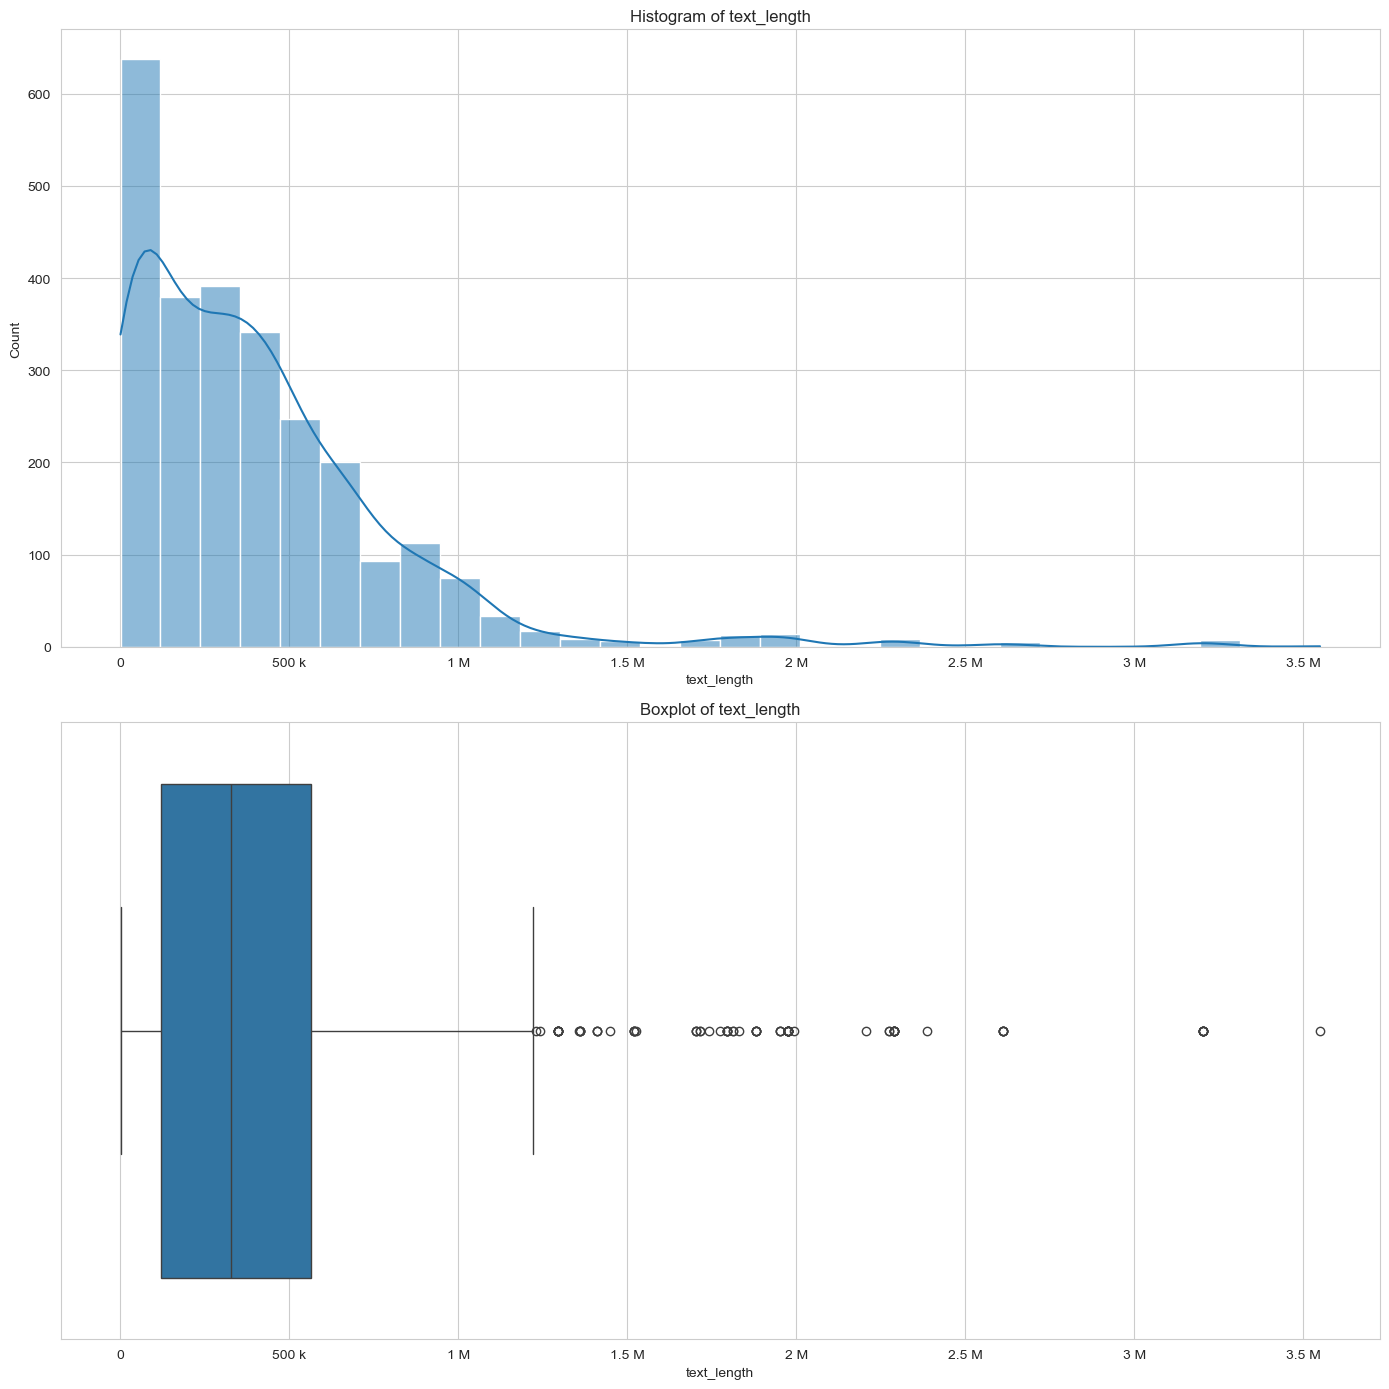

In [31]:
# Example usage for 'text_length'
visualize_numerical(novel_df, 'text_length')

### Analysis of Text Length Distribution

- **Interquartile Range (IQR):** Spans from 121,336 to 562,502 characters, with the median text length at 326,189 characters. This indicates a broad diversity in novel lengths, from short stories to extensive narratives.
- **Outliers:** Significant variability is evident, with some novels reaching up to 3,550,285 characters. These outliers highlight the presence of exceptionally long novels within the dataset.
- **Central Tendency:** The mean text length is approximately 409,887 characters, with a standard deviation of 410,567, pointing to a wide spread in the lengths of novels.

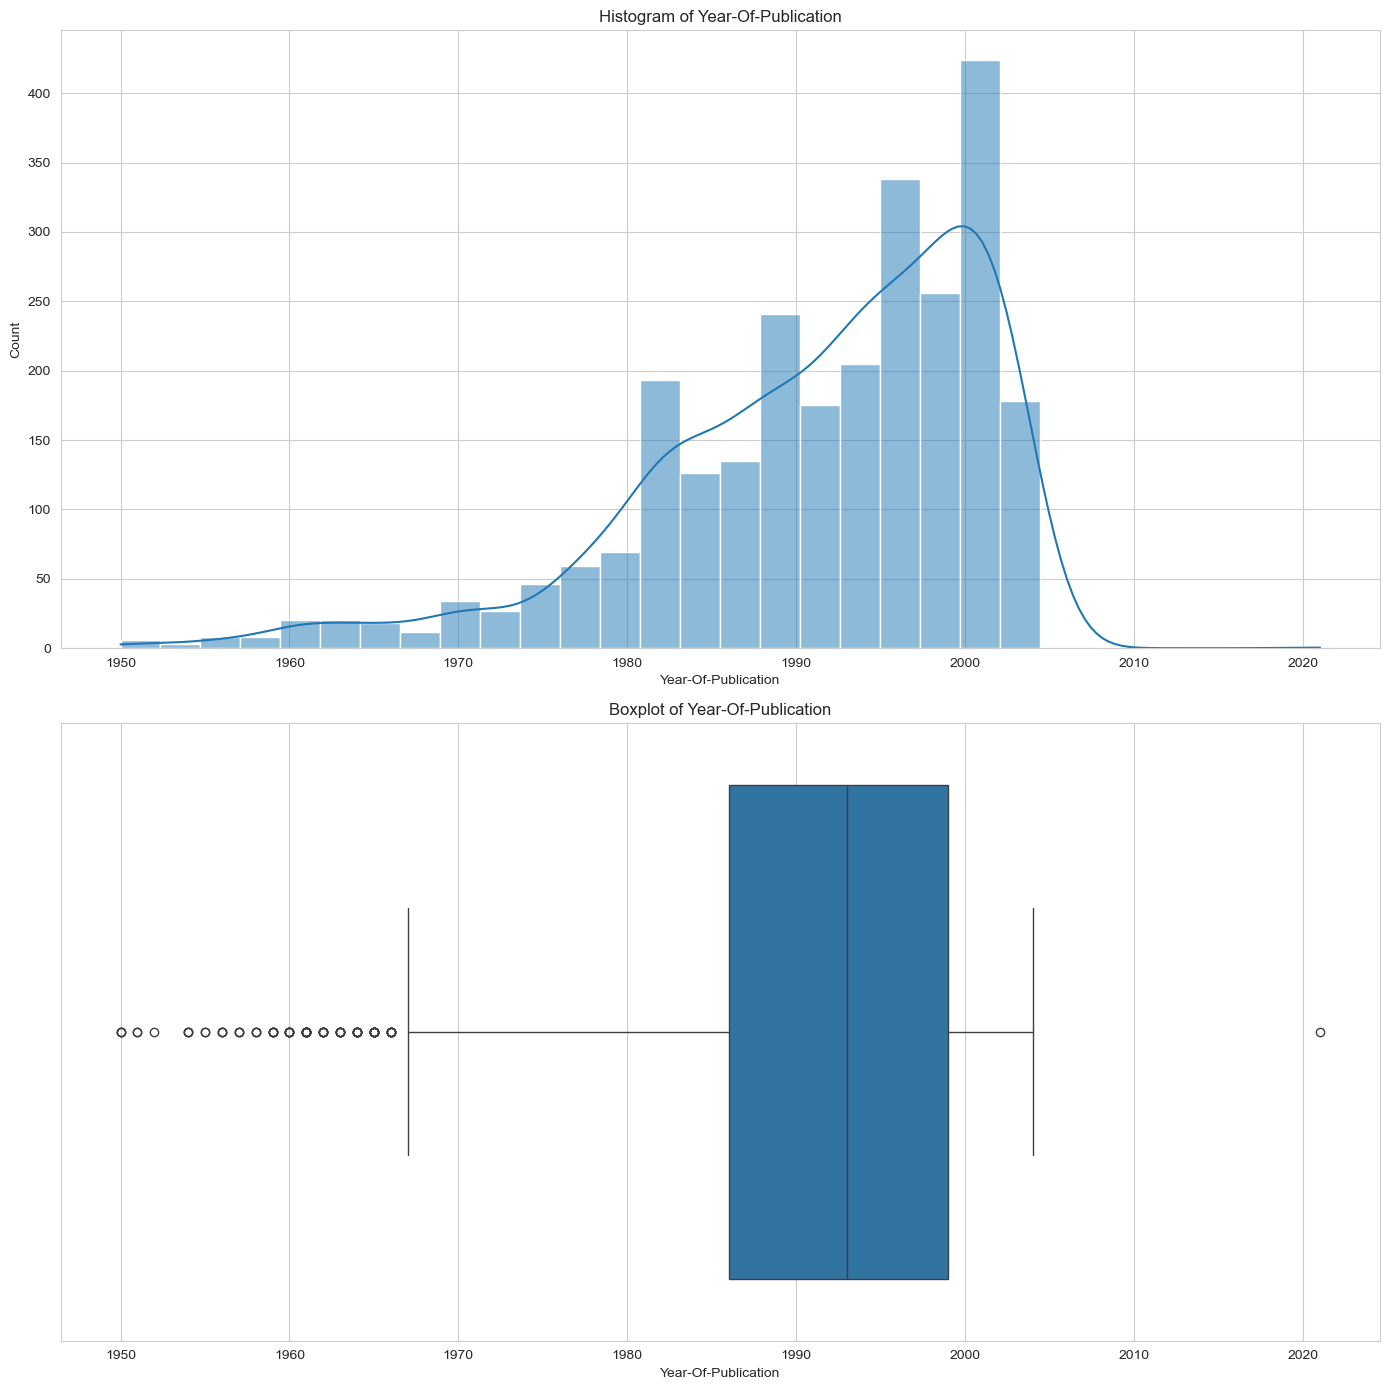

In [32]:
# Example usage for 'Year-Of-Publication'
visualize_numerical(novel_df, 'Year-Of-Publication')

Above we see the distribution of the `Year of Publication`.

- **Interquartile Range (IQR):** Spans from 1986 to 1999, with the median year of publication at 1993. This suggests a concentration of book publications in the late 20th century.
- **Outliers:** A significant number of publications before 1986 appear as outliers, indicating active publishing before the central distribution period. Additionally, a single outlier in 2021 points to an exceptional recent publication.
- **Central Tendency:** The mean publication year is 1991.28, with a standard deviation of 9.99, reflecting a clustering of publications around the late 20th century.

These observations suggest an increase in publishing activity towards the end of the 20th century, with varied publishing activity noted prior to 1986.